In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('C:/Users/ambik/Documents/Solar Prediction/Solar_Prediction.csv')

In [4]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
1,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
2,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
3,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
4,1475227824,9/29/2016 12:00:00 AM,23:30:24,1.21,48,30.46,64,120.20,5.62,06:13:00,18:13:00


In [5]:
df.isnull().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32685 entries, 0 to 32684
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32685 non-null  int64  
 1   Data                    32685 non-null  object 
 2   Time                    32685 non-null  object 
 3   Radiation               32685 non-null  float64
 4   Temperature             32685 non-null  int64  
 5   Pressure                32685 non-null  float64
 6   Humidity                32685 non-null  int64  
 7   WindDirection(Degrees)  32685 non-null  float64
 8   Speed                   32685 non-null  float64
 9   TimeSunRise             32685 non-null  object 
 10  TimeSunSet              32685 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [8]:
df.shape

(32685, 11)

In [11]:
# convert unixtime to datetime
df['UNIXTime']=pd.to_datetime(df['UNIXTime'],unit='s')

In [33]:
df['TimeSunRise'] = pd.to_datetime(df['TimeSunRise'], format='%H:%M:%S')
df['TimeSunSet'] = pd.to_datetime(df['TimeSunSet'], format='%H:%M:%S')
df['Time']=pd.to_datetime(df['Time'],format='%H:%M:%S')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32685 entries, 0 to 32684
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   UNIXTime                32685 non-null  datetime64[ns]
 1   Data                    32685 non-null  object        
 2   Time                    32685 non-null  datetime64[ns]
 3   Radiation               32685 non-null  float64       
 4   Temperature             32685 non-null  int64         
 5   Pressure                32685 non-null  float64       
 6   Humidity                32685 non-null  int64         
 7   WindDirection(Degrees)  32685 non-null  float64       
 8   Speed                   32685 non-null  float64       
 9   TimeSunRise             32685 non-null  datetime64[ns]
 10  TimeSunSet              32685 non-null  datetime64[ns]
 11  SunRiseSec              32685 non-null  int64         
 12  SunSetSec               32685 non-null  int64 

In [36]:
def time_to_seconds(t):
    return t.hour * 3600 + t.minute * 60 + t.second

In [38]:
df['SunRiseSec'] = df['TimeSunRise'].apply(time_to_seconds)
df['SunSetSec'] = df['TimeSunSet'].apply(time_to_seconds)
df['Time']=df['Time'].apply(time_to_seconds)

In [39]:
df['TimeFromSunRise'] = df['Time'] - df['SunRiseSec']
df['TimeFromSunSet'] = df['Time'] - df['SunSetSec']

In [40]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,SunRiseSec,SunSetSec,TimeFromSunRise,TimeFromSunSet
0,2016-09-30 09:50:23,9/29/2016 12:00:00 AM,85823,1.21,48,30.46,58,176.78,3.37,1900-01-01 06:13:00,1900-01-01 18:13:00,22380,65580,63443,20243
1,2016-09-30 09:45:26,9/29/2016 12:00:00 AM,85526,1.23,48,30.46,57,158.75,3.37,1900-01-01 06:13:00,1900-01-01 18:13:00,22380,65580,63146,19946
2,2016-09-30 09:40:21,9/29/2016 12:00:00 AM,85221,1.21,48,30.46,60,137.71,3.37,1900-01-01 06:13:00,1900-01-01 18:13:00,22380,65580,62841,19641
3,2016-09-30 09:35:24,9/29/2016 12:00:00 AM,84924,1.17,48,30.46,62,104.95,5.62,1900-01-01 06:13:00,1900-01-01 18:13:00,22380,65580,62544,19344
4,2016-09-30 09:30:24,9/29/2016 12:00:00 AM,84624,1.21,48,30.46,64,120.20,5.62,1900-01-01 06:13:00,1900-01-01 18:13:00,22380,65580,62244,19044


In [41]:
# Select Relevant features
features = ['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'Time', 'TimeFromSunRise', 'TimeFromSunSet']
target = 'Radiation'
X = df[features]
y = df[target]

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [45]:
y_pred = model.predict(X_test)

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 35.21007416245984
Mean Squared Error: 7869.988402850961
Root Mean Squared Error: 88.71295510155753
R^2 Score: 0.9203639576137119


<AxesSubplot:>

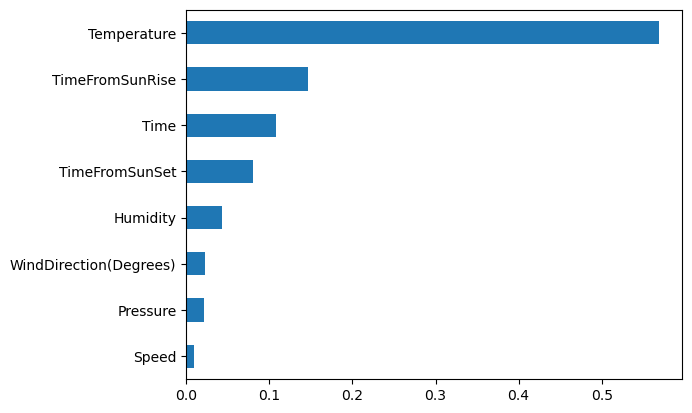

In [47]:
feature_importances = pd.Series(model.feature_importances_, index=features)
feature_importances.sort_values().plot(kind='barh')

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'Best Model Parameters: {grid_search.best_params_}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Model Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mean Absolute Error: 35.10036888932283
Mean Squared Error: 7851.969589994662
Root Mean Squared Error: 88.6113400756058
R^2 Score: 0.9205462891332673
